# WINE QUALITY

[[reference link_dataset]](https://www.kaggle.com/datasets/rajyellow46/wine-quality/data)

[[reference link_coding]](https://www.kaggle.com/code/mgmarques/wines-type-and-quality-classification-exercises)

---

In [ ]:
# @title Establishing python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

In [ ]:
# @title Dataset Extraction from CSV File
# extraction of data set from csv file; also removing row indexes
raw = pd.read_csv('/winequalityN.csv')
raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



# **TRANSFORMING AND MANIPULATING CSV DATAFRAME** #

In [ ]:
# @title Cleaning and Transforming Frames

# Replacing spaces with '_' in column title
raw.columns = raw.columns.str.replace(' ', '_')

# Labeling Wine Quality into 'low', 'medium', 'high'
raw['quality_label'] = raw.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')
raw.quality_label = pd.Categorical(raw.quality_label, categories=['low', 'medium', 'high'], ordered=True)

# Re-shuffle records just to randomize data points
# raw = raw.sample(frac=1, random_state=101).reset_index(drop=True)

# Overviewing data set info
print('DATAFRAME(transformed) OVERVIEW')
raw.info()

DATAFRAME(transformed) OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  6497 non-null   object  
 1   fixed_acidity         6487 non-null   float64 
 2   volatile_acidity      6489 non-null   float64 
 3   citric_acid           6494 non-null   float64 
 4   residual_sugar        6495 non-null   float64 
 5   chlorides             6495 non-null   float64 
 6   free_sulfur_dioxide   6497 non-null   float64 
 7   total_sulfur_dioxide  6497 non-null   float64 
 8   density               6497 non-null   float64 
 9   pH                    6488 non-null   float64 
 10  sulphates             6493 non-null   float64 
 11  alcohol               6497 non-null   float64 
 12  quality               6497 non-null   int64   
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(

In [ ]:
# @title Dataset Overview
raw.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [ ]:
# @title Exploring DataFrame: identifying identicals according to columns 'type'

## CREATING DATAFRAME WITH COUNTING OCCURRENCE OF ELEMENTS IN A DATAFRAME
''' creating a df with 2 columns (wine type, data counts) '''

# ---> dropping identicals in the Dataframe
def summarize_column(drop_indenticals):
  rare_code = drop_indenticals.drop_duplicates().reset_index(drop=True).to_frame()
  return rare_code

# ---> type summary DataFrame: summary_code_df
summary_type_col = summarize_column(raw['type'])

# ---> counting identicals in a column
type_counts = raw['type'].value_counts().reset_index(drop=True)

# ---> concatenating 2 columns
df_type_counts = pd.concat([summary_type_col, type_counts],axis=1)
df_type_counts.columns=['Wine_Type','Count']
print(df_type_counts) # alphabetically sorted by type
print()

# ---> counterchecking
sum_type_counts = str(df_type_counts['Count'].sum())
print('Sum of Counted Data Entries for white and red wines: ' + sum_type_counts)
print('Sum of Data Entries (rows) from Data Set: ' + str(len(raw)))

  Wine_Type  Count
0     white   4898
1       red   1599

Sum of Counted Data Entries for white and red wines: 6497
Sum of Data Entries (rows) from Data Set: 6497


In [ ]:
# @title Type Column Summary
print('Number of data set (in rows) according to wine types:')
print('White Wine = ' + str(type_counts[0]))
print('Red Wine = ' + str(type_counts[1]))


Number of data set (in rows) according to wine types:
White Wine = 4898
Red Wine = 1599




---



In [ ]:
# @title DataFrame: Type White Wine
# Creating White Wine Dataframe = df_type_white
df_type_white = raw[raw["type"].isin(["white"])].reset_index(drop=True)
df_type_white


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium


In [ ]:
# @title Identifyting 'NaN' Values for Type: White Wine

## COUNTING 'NaN' VALUES in the DataFrame = df_type_white
nan_count = df_type_white.isna().sum()
print("Count of NaN values in df_type_white:")
print(nan_count)


Count of NaN values in df_type_white:
type                    0
fixed_acidity           8
volatile_acidity        7
citric_acid             2
residual_sugar          2
chlorides               2
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
quality_label           0
dtype: int64


In [ ]:
# @title Cleaning Dataframe: Type White Wine

# ---> removing rows containing NaN values from the DataFrame = df_type_white
df_type_white_clean = df_type_white.dropna().reset_index(drop=True)
df_type_white_cleaned = df_type_white_clean.reindex(sorted(df_type_white_clean.columns), axis=1)

print("DataFrame after removing rows with NaN values:")
print(df_type_white_cleaned)


DataFrame after removing rows with NaN values:
      alcohol  chlorides  citric_acid  density  fixed_acidity  \
0         8.8      0.045         0.36  1.00100            7.0   
1         9.5      0.049         0.34  0.99400            6.3   
2        10.1      0.050         0.40  0.99510            8.1   
3         9.9      0.058         0.32  0.99560            7.2   
4         9.9      0.058         0.32  0.99560            7.2   
...       ...        ...          ...      ...            ...   
4865     10.6      0.038         0.32  0.99074            5.7   
4866     11.2      0.039         0.29  0.99114            6.2   
4867      9.6      0.047         0.36  0.99490            6.6   
4868     12.8      0.022         0.30  0.98869            5.5   
4869     11.8      0.020         0.38  0.98941            6.0   

      free_sulfur_dioxide    pH  quality quality_label  residual_sugar  \
0                    45.0  3.00        6        medium            20.7   
1                    14.

# EXPLORING DATASET: for type = white wine

In [ ]:
# @title Statistical Overview of Dataset: Type White Wine
df_type_white_cleaned.describe().round(2)


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
count,4870.00,4870.00,4870.00,4870.00,4870.00,4870.00,4870.00,4870.00,4870.00,4870.00,4870.00,4870.00
mean,10.52,0.05,0.33,0.99,6.86,35.32,3.19,5.88,6.39,0.49,138.34,0.28
std,1.23,0.02,0.12,0.00,0.84,17.01,0.15,0.89,5.07,0.11,42.49,0.10
min,8.00,0.01,0.00,0.99,3.80,2.00,2.72,3.00,0.60,0.22,9.00,0.08
25%,9.50,0.04,0.27,0.99,6.30,23.00,3.09,5.00,1.70,0.41,108.00,0.21
50%,10.40,0.04,0.32,0.99,6.80,34.00,3.18,6.00,5.20,0.47,134.00,0.26
75%,11.40,0.05,0.39,1.00,7.30,46.00,3.28,6.00,9.90,0.55,167.00,0.32
max,14.20,0.35,1.66,1.04,14.20,289.00,3.82,9.00,65.80,1.08,440.00,1.10





---



NOTES:


*   having an erratic standard deviation across different attributes, it can be inferred that the row dataset MAY NOT represent only 1 wine formulation. Hence, target: identify which row dataset are quite similar to another and different from one another

*   for Exploratory Analysis: given the highest standard deviation value, investigate attribute 'total_sulfur_dioxide'



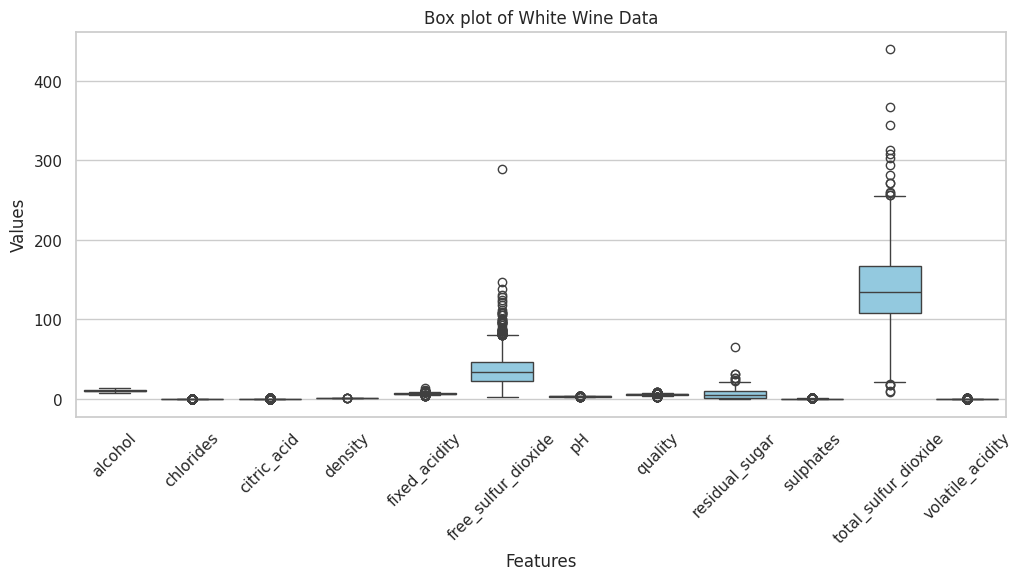

In [ ]:
# @title Box Plot Overview: White Wine dataset across 12 attributes (regardless of quality type)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

sns.boxplot(data=df_type_white_cleaned, color='skyblue')

plt.title('Box plot of White Wine Data')
plt.xlabel('Features')
plt.ylabel('Values')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


Box Plot above visualizes how values greatly deviates from the other in attributes (1) total_sulfur_dioxide, (2) free_sulfur_dioxide

In [ ]:
# @title DataFrame: [high, medium, low] Qualities, [white] Type Wines

df_high_ql_white = df_type_white_cleaned[df_type_white_cleaned['quality_label'] == 'high'].drop(columns=['type'])
df_med_ql_white = df_type_white_cleaned[df_type_white_cleaned['quality_label'] == 'medium'].drop(columns=['type'])
df_low_ql_white = df_type_white_cleaned[df_type_white_cleaned['quality_label'] == 'low'].drop(columns=['type'])


To identify which row dataset are quite similar to another and different from one another, [WHITE] Type wines were sorted according to qualities [high], [medium]], [low]

In [ ]:
# @title Table of Max and Min Values per attribute for the Multiple Box Plot

def calculate_attribute_values(df, function):
    values = []
    for column in df.columns:
        if column not in ['type', 'quality_label']:  # Exclude the 'type' and 'quality_label' columns
            value = function(df[column])
            values.append((column, value))
    return values

def create_quality_dataframe(df, quality):
    # Filter DataFrame based on quality
    df_quality = df[df_ql_white == quality]

    # Calculate attribute values
    df_max_values = calculate_attribute_values(df_quality, function=pd.Series.max)
    df_min_values = calculate_attribute_values(df_quality, function=pd.Series.min)

    # Create DataFrame for attribute values
    df_minmax_per_attribute = pd.DataFrame(df_max_values + df_min_values, columns=['attribute', 'value']).round(2)

    # Add 'quality' column
    df_minmax_per_attribute.insert(0, 'quality', quality)

    return df_minmax_per_attribute

# Assuming df_type_white_cleaned, df_ql_white, df_high_ql_white, and df_med_ql_white are available DataFrames
df_minmax_per_attribute_high_white_wine = create_quality_dataframe(df_type_white_cleaned, 'high')
df_minmax_per_attribute_med_white_wine = create_quality_dataframe(df_type_white_cleaned, 'medium')
df_minmax_per_attribute_low_white_wine = create_quality_dataframe(df_type_white_cleaned, 'low')


# Concatenate DataFrames
result = pd.concat([df_minmax_per_attribute_high_white_wine, df_minmax_per_attribute_med_white_wine, df_minmax_per_attribute_low_white_wine]).reset_index(drop=True)



<ipython-input-70-c53da1a9a7a2>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


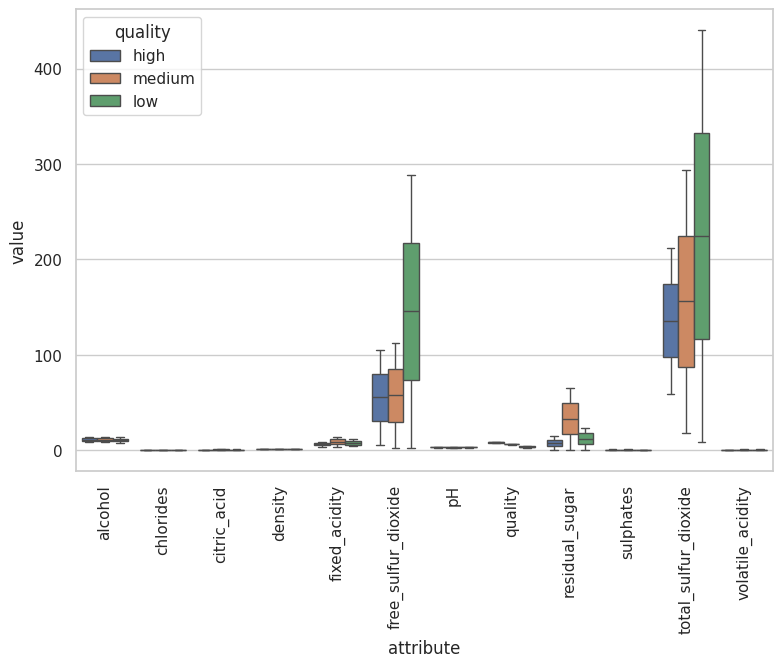

In [ ]:
# @title Box Plot according to Quality Types of [White] Type Wines

def create_boxplot(result, omit_attributes=None, keep_attributes=None, y_increment=None):
    # If both omit_attributes and keep_attributes are provided, raise an error
    if omit_attributes and keep_attributes:
        raise ValueError("Cannot specify both omit_attributes and keep_attributes.")

    # If omit_attributes is provided, filter the DataFrame to exclude specified attributes
    if omit_attributes:
        filtered_result = result[~result['attribute'].isin(omit_attributes)]
    # If keep_attributes is provided, filter the DataFrame to include only specified attributes
    elif keep_attributes:
        filtered_result = result[result['attribute'].isin(keep_attributes)]
    # If neither omit_attributes nor keep_attributes are provided, keep all attributes
    else:
        filtered_result = result

    # Create a wider figure
    fig, ax = plt.subplots(figsize=(9, 6))

    # Create grouped boxplot
    sns.boxplot(x=filtered_result['attribute'],
                y=filtered_result['value'],
                hue=filtered_result['quality'],
                ax=ax)  # Assign the axis to the plot

    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Set y-axis increment if specified
    if y_increment:
        ax.yaxis.set_major_locator(plt.MultipleLocator(y_increment))

    # Show the plot
    plt.show()

# Example usage:
# Omit specific attributes, for example, 'free_sulfur_dioxide' and 'total_sulfur_dioxide'
#attributes_to_omit = ['free_sulfur_dioxide', 'total_sulfur_dioxide']
#create_boxplot(result, omit_attributes=attributes_to_omit)

# Or, keep specific attributes, for example, 'alcohol' and 'density'
#attributes_to_keep = ['free_sulfur_dioxide', 'total_sulfur_dioxide']
#create_boxplot(result, keep_attributes=attributes_to_keep)

# Or, keep all attributes
# create_boxplot(result)

# Specify y-axis increment
y_increment = 100  # y-axis increment
create_boxplot(result, y_increment=y_increment)


<ipython-input-70-c53da1a9a7a2>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


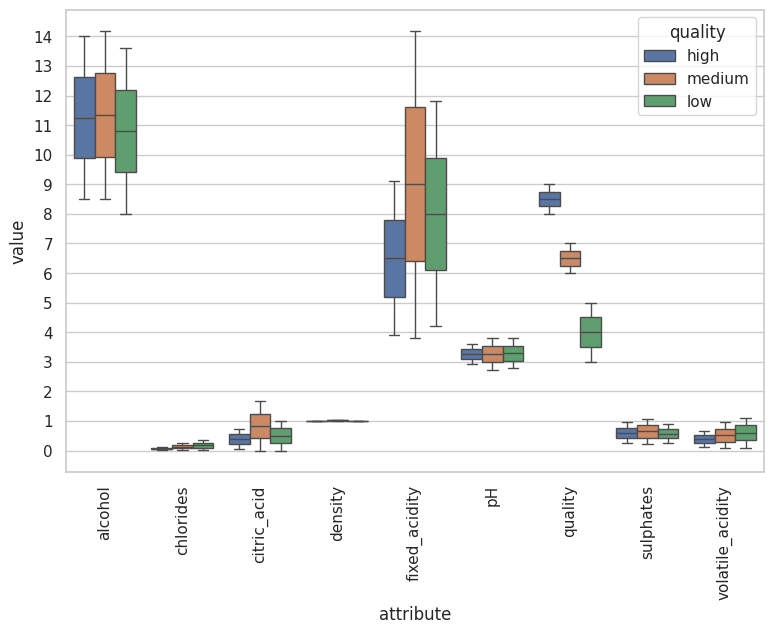

In [ ]:
# @title Zooming into non-extreme attributes: all except sulfur_dioxides and 'residual_sugar'

# Omit specific attributes:
attributes_to_omit = ['free_sulfur_dioxide', 'total_sulfur_dioxide', 'residual_sugar']

# Specify y-axis increment
y_increment = 1  # y-axis increment
create_boxplot(result, omit_attributes=attributes_to_omit, y_increment=y_increment)

# **EXLORATORY ANALYSIS: 'total_sulfur_dioxide'**

In [ ]:
# @title Overview of Working Dataframe: for (type) White Wine; (attribute) Total Sulfur Dioxide
df_tsd_white = df_type_white_cleaned['total_sulfur_dioxide']
print(f'Median Value: {df_tsd_white.median()}') # to identify median
df_tsd_white.describe().round(2)

Median Value: 134.0


count    4870.00
mean      138.34
std        42.49
min         9.00
25%       108.00
50%       134.00
75%       167.00
max       440.00
Name: total_sulfur_dioxide, dtype: float64

In [ ]:
# @title Quartiles: Generating Table of Values according to desired inputted quartile range
'''generation of a table having values within the desired quartile as inputted in the code line'''

def filter_quartile(df, lower, upper=None):
    if upper is None:
        return df[df <= lower].sort_values()
    return df[(df > lower) & (df <= upper)].sort_values()

# Calculate quartiles
quartiles = {
    'Q1': df_tsd_white.quantile(0.25),
    'Q2': df_tsd_white.quantile(0.5),
    'Q3': df_tsd_white.quantile(0.75),
    'Q4': df_tsd_white.quantile(1)
}

def get_quartile_table(quartile):
    if quartile not in quartiles:
        return "Invalid quartile. Please enter Q1, Q2, Q3, or Q4."

    upper = quartiles[quartile]
    if quartile == 'Q1':
        return filter_quartile(df_tsd_white, upper)
    elif quartile == 'Q2':
        lower = quartiles['Q1']
        return filter_quartile(df_tsd_white, lower, upper)
    elif quartile == 'Q3':
        lower = quartiles['Q2']
        return filter_quartile(df_tsd_white, lower, upper)
    elif quartile == 'Q4':
        lower = quartiles['Q3']
        return filter_quartile(df_tsd_white, lower, upper)

# Input desired quartile to obtain values within the range
desired_quartile = "Q4"
quartile_table = get_quartile_table(desired_quartile)
#print(f"Table of Values within {desired_quartile}:")
#print(quartile_table)



SUMMARY
*   Q1 = 108.0 [1229 frequency]
*   Q2 = 134.0 [1227 frequency]
*   Q3 = 167.0 [1203 frequency]
*   Q4 = 440.0 [1211 frequency]

Total values (frequency): 4870

In [ ]:
# @title Frequency Distribution Table

df_tsd_white = df_type_white_cleaned['total_sulfur_dioxide']
class_boundary = [(0, 50.5), (50.5, 100.5), (100.5, 150.5), (150.5, 200.5), (200.5, 250.5), (250.5, 300.5), (300.5, 350.5), (350.5, 400.5), (400.5, 450.5)]

counts = []
labels = []
lower_class_boundaries = []
upper_class_boundaries = []

for lower, upper in class_boundary:
    count = df_tsd_white[(df_tsd_white > lower) & (df_tsd_white <= upper)].count()
    counts.append(count)
    labels.append(f'{lower} - {upper}')
    lower_class_boundaries.append(lower)
    upper_class_boundaries.append(upper)

result_df = pd.DataFrame({
    'Lower_Class_Boundary': lower_class_boundaries,
    'Upper_Class_Boundary': upper_class_boundaries,
    'Frequency': counts
}, index=labels)

print(result_df)


               Lower_Class_Boundary  Upper_Class_Boundary  Frequency
0 - 50.5                        0.0                  50.5         49
50.5 - 100.5                   50.5                 100.5        869
100.5 - 150.5                 100.5                 150.5       2156
150.5 - 200.5                 150.5                 200.5       1409
200.5 - 250.5                 200.5                 250.5        363
250.5 - 300.5                 250.5                 300.5         18
300.5 - 350.5                 300.5                 350.5          4
350.5 - 400.5                 350.5                 400.5          1
400.5 - 450.5                 400.5                 450.5          1


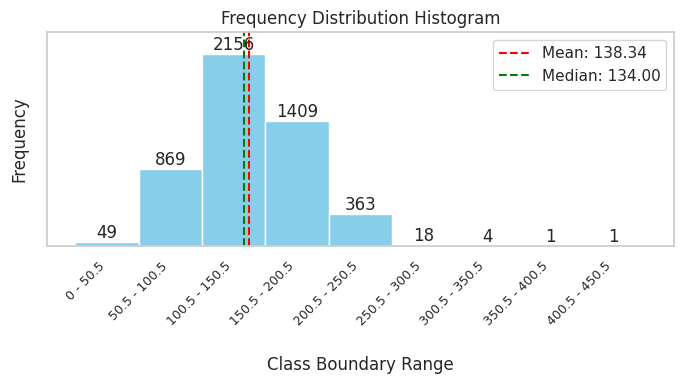

In [ ]:
# @title Frequency Distribution: Histogram

plt.figure(figsize=(7, 4))
bars = plt.bar(result_df.index, result_df['Frequency'], color='skyblue', width=1)
plt.xlabel('Class Boundary Range', labelpad=20)  # adjust labelpad as needed
plt.ylabel('Frequency')
plt.title('Frequency Distribution Histogram')

# Customizing x-axis tick labels font size
plt.xticks(fontsize=9, rotation=45, ha='right')

# Customizing y-ticks
max_count = max(result_df['Frequency'])
yticks = np.arange(0, max_count + 400, 400)
plt.yticks(yticks, [])  # Setting an empty list for y-tick labels

# Annotating y-tick values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom')

# Find the index of the bar corresponding to the range '100.5 - 150.5'
bar_index = result_df.index.get_loc('100.5 - 150.5')

# RED: Calculate the position for the grid line within 3/4 of the bar
bar_position_red = bars[bar_index].get_x() + bars[bar_index].get_width() / 4 * 3        #red
bar_position_green = bars[bar_index].get_x() + bars[bar_index].get_width() / 3 * 2      #green

# Adding dashed grid line along the x-axis
plt.axvline(bar_position_red, color='red', linestyle='--', label='Mean: 138.34')        #red
plt.axvline(bar_position_green, color='green', linestyle='--', label='Median: 134.00')  #green

# Display the legend
plt.legend()

plt.grid(False)  # Turn off gridlines

plt.tight_layout()
plt.show()




---


**// REMOVAL OF OUTLIERS AND FOLOW-UP ANALYSIS**


---



In [ ]:
# @title Ver 1 Cleaning: Removing Outliers

'''removing 6 outliers > = 300.5'''
df_cleaned_tsd_white = df_tsd_white[df_tsd_white < 300.5].sort_values()
print(f'From 4870 rows to {df_cleaned_tsd_white.count()}')
print(f'Updated Mean Value: {df_cleaned_tsd_white.mean().round(2)}')
print(f'Updated Median Value: {df_cleaned_tsd_white.median().round(2)}')
df_cleaned_tsd_white

From 4870 rows to 4864
Updated Mean Value: 138.08
Updated Median Value: 134.0


3684      9.0
3875     10.0
3069     18.0
3068     18.0
721      19.0
        ...  
375     260.0
219     272.0
3024    272.0
2354    282.0
3126    294.0
Name: total_sulfur_dioxide, Length: 4864, dtype: float64

In [ ]:
# @title Frequency Distribution Table (exc. 6 outliers; increments by 30s) [ver 1]

class_boundary_o = [(i + 0.5, i + 30.5) for i in range(0, 271, 30)]

counts_o = []
labels_o = []
lower_class_boundaries_o = []
upper_class_boundaries_o = []

for lower_o, upper_o in class_boundary_o:
    count_o = df_cleaned_tsd_white[(df_cleaned_tsd_white > lower_o) & (df_cleaned_tsd_white <= upper_o)].count()
    counts_o.append(count_o)
    labels_o.append(f'{lower_o} - {upper_o}')
    lower_class_boundaries_o.append(lower_o)
    upper_class_boundaries_o.append(upper_o)

result_df_o = pd.DataFrame({
    'Lower_Class_Boundary': lower_class_boundaries_o,
    'Upper_Class_Boundary': upper_class_boundaries_o,
    'Frequency': counts_o
}, index=labels_o)

print(result_df_o)


               Lower_Class_Boundary  Upper_Class_Boundary  Frequency
0.5 - 30.5                      0.5                  30.5         19
30.5 - 60.5                    30.5                  60.5         69
60.5 - 90.5                    60.5                  90.5        485
90.5 - 120.5                   90.5                 120.5       1245
120.5 - 150.5                 120.5                 150.5       1256
150.5 - 180.5                 150.5                 180.5        969
180.5 - 210.5                 180.5                 210.5        568
210.5 - 240.5                 210.5                 240.5        208
240.5 - 270.5                 240.5                 270.5         41
270.5 - 300.5                 270.5                 300.5          4


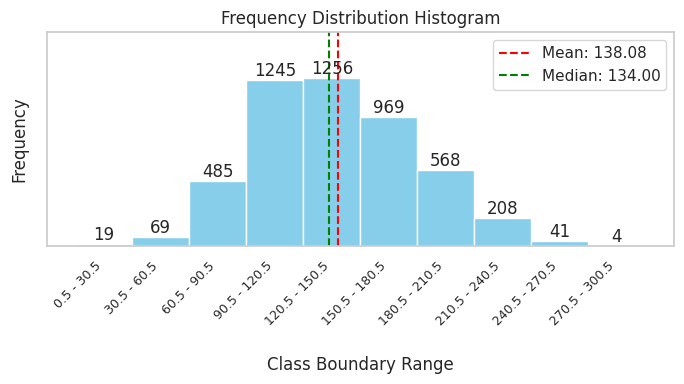

In [ ]:
# @title Frequency Distribution: Histogram (exc. 6 outliers; increments by 30s) [ver 1]

plt.figure(figsize=(7, 4))
bars = plt.bar(result_df_o.index, result_df_o['Frequency'], color='skyblue', width=1)
plt.xlabel('Class Boundary Range', labelpad=20)  # adjust labelpad as needed
plt.ylabel('Frequency')
plt.title('Frequency Distribution Histogram')

# Customizing x-axis tick labels font size
plt.xticks(fontsize=9, rotation=45, ha='right')

# Customizing y-ticks
max_count = max(result_df_o['Frequency'])
yticks = np.arange(0, max_count + 400, 400)
plt.yticks(yticks, [])  # Setting an empty list for y-tick labels

# Annotating y-tick values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom')

# Find the index of the bar corresponding to the range '100.5 - 150.5'
bar_index = result_df_o.index.get_loc('120.5 - 150.5')

# RED: Calculate the position for the grid line within 3/4 of the bar
bar_position_red = bars[bar_index].get_x() + bars[bar_index].get_width() / 5 * 3        #red
bar_position_green = bars[bar_index].get_x() + bars[bar_index].get_width() / 8 * 3.6      #green

# Adding dashed grid line along the x-axis
plt.axvline(bar_position_red, color='red', linestyle='--', label='Mean: 138.08')        #red
plt.axvline(bar_position_green, color='green', linestyle='--', label='Median: 134.00')  #green

# Display the legend
plt.legend()

plt.grid(False)  # Turn off gridlines

plt.tight_layout()
plt.show()


In [ ]:
# @title Ver 2 Cleaning: Removing Outliers

'''removing 4 more outliers > = 270.5'''
df2_cleaned_tsd_white = df_cleaned_tsd_white[df_cleaned_tsd_white < 270.5].sort_values()
print(f'From 4870 rows, to {df_cleaned_tsd_white.count()}, to {df2_cleaned_tsd_white.count()}')
print(f'Updated Mean Value: {df2_cleaned_tsd_white.mean().round(2)}')
print(f'Updated Median Value: {df2_cleaned_tsd_white.median().round(2)}')
df2_cleaned_tsd_white

From 4870 rows, to 4864, to 4860
Updated Mean Value: 137.97
Updated Median Value: 134.0


3684      9.0
3875     10.0
3069     18.0
3068     18.0
721      19.0
        ...  
106     255.0
1916    256.0
1918    256.0
4488    259.0
375     260.0
Name: total_sulfur_dioxide, Length: 4860, dtype: float64

In [ ]:
# @title Frequency Distribution Table (exc. 6 outliers; increments by 30s) [ver 2]

class_boundary_2 = [(i + 0.5, i + 30.5) for i in range(0, 241, 30)]

counts_2 = []
labels_2 = []
lower_class_boundaries_2 = []
upper_class_boundaries_2 = []

for lower_2, upper_2 in class_boundary_2:
    count_2 = df2_cleaned_tsd_white[(df2_cleaned_tsd_white > lower_2) & (df2_cleaned_tsd_white <= upper_2)].count()
    counts_2.append(count_2)
    labels_2.append(f'{lower_2} - {upper_2}')
    lower_class_boundaries_2.append(lower_2)
    upper_class_boundaries_2.append(upper_2)

result_df_2 = pd.DataFrame({
    'Lower_Class_Boundary': lower_class_boundaries_2,
    'Upper_Class_Boundary': upper_class_boundaries_2,
    'Frequency': counts_2
}, index=labels_2)

print(result_df_2)


               Lower_Class_Boundary  Upper_Class_Boundary  Frequency
0.5 - 30.5                      0.5                  30.5         19
30.5 - 60.5                    30.5                  60.5         69
60.5 - 90.5                    60.5                  90.5        485
90.5 - 120.5                   90.5                 120.5       1245
120.5 - 150.5                 120.5                 150.5       1256
150.5 - 180.5                 150.5                 180.5        969
180.5 - 210.5                 180.5                 210.5        568
210.5 - 240.5                 210.5                 240.5        208
240.5 - 270.5                 240.5                 270.5         41


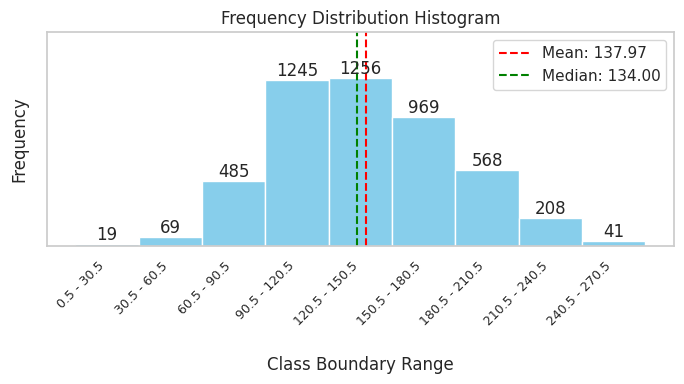

In [ ]:
# @title Frequency Distribution: Histogram (exc. 6 outliers; increments by 30s) [ver 2]

plt.figure(figsize=(7, 4))
bars = plt.bar(result_df_2.index, result_df_2['Frequency'], color='skyblue', width=1)
plt.xlabel('Class Boundary Range', labelpad=20)  # adjust labelpad as needed
plt.ylabel('Frequency')
plt.title('Frequency Distribution Histogram')

# Customizing x-axis tick labels font size
plt.xticks(fontsize=9, rotation=45, ha='right')

# Customizing y-ticks
max_count = max(result_df_2['Frequency'])
yticks = np.arange(0, max_count + 400, 400)
plt.yticks(yticks, [])  # Setting an empty list for y-tick labels

# Annotating y-tick values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom')

# Find the index of the bar corresponding to the range '100.5 - 150.5'
bar_index = result_df_2.index.get_loc('120.5 - 150.5')

# RED: Calculate the position for the grid line within 3/4 of the bar
bar_position_red = bars[bar_index].get_x() + bars[bar_index].get_width() / 8 * 4.65        #red
bar_position_green = bars[bar_index].get_x() + bars[bar_index].get_width() / 8 * 3.6      #green

# Adding dashed grid line along the x-axis
plt.axvline(bar_position_red, color='red', linestyle='--', label='Mean: 137.97')        #red
plt.axvline(bar_position_green, color='green', linestyle='--', label='Median: 134.00')  #green

# Display the legend
plt.legend()

plt.grid(False)  # Turn off gridlines

plt.tight_layout()
plt.show()


In [ ]:
# @title Indexes of deemed 10 outliers in white wine (type), 'total_sulfur_dioxide'(attribute)
df_tsd_white_outliers = df_tsd_white[df_tsd_white > 270.5]

outlier_indexes = []

for index, value in df_tsd_white_outliers.items():
    outlier_indexes.append(index)

print("Note: index numbers of rows containing outliers with respect to total_sulfur_dioxide attribute; values > 270.5 ")
print(outlier_indexes)

Note: index numbers of rows containing outliers with respect to total_sulfur_dioxide attribute; values > 270.5 
[219, 314, 1393, 1907, 2103, 2354, 2630, 3024, 3126, 4719]




---

# **EXPLORATORY ANALYSIS: 'quality_label'**


---



In [ ]:
# @title Overview of Working Dataframe: for (type) White Wine; (attribute) Quality Label
df_ql_white = df_type_white_cleaned['quality_label']
low_ql = df_ql_white[df_ql_white == 'low']
med_ql = df_ql_white[df_ql_white == 'medium']
high_ql = df_ql_white[df_ql_white == 'high']
print(f'Low Quality Frequency: {low_ql.count()}')
print(f'Medium Quality Frequency: {med_ql.count()}')
print(f'High Quality Frequency: {high_ql.count()}')
print(low_ql.count() + med_ql.count() + high_ql.count())

Low Quality Frequency: 1630
Medium Quality Frequency: 3061
High Quality Frequency: 179
4870


In [ ]:
# @title To enumerate column names as a tabled list
# Define a lambda function to retrieve column names
column_names = lambda df: list(df.columns)


# Get column names
col_attributes = pd.DataFrame(column_names(df_high_ql_white))
col_attributes

,0
0,alcohol
1,chlorides
2,citric_acid
3,density
4,fixed_acidity
5,free_sulfur_dioxide
6,pH
7,quality
8,quality_label
9,residual_sugar
